# Problem statement: Market Segmentation for the release of a new digital streaming service

In [ ]:
# Importing libraries to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
import seaborn as sb

In [ ]:
# Mounting google drive to access datasets and changing directory
# to working directory

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/DSPM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DSPM


In [ ]:
# Loading the three datasets for delloite digital democracy survey edition 9, 10 and 11

dds_9_df = pd.read_excel("./DDS9_Data_Extract_with_labels.xlsx")
dds_10_df = pd.read_excel("./DDS10_Data_Extract_with_labels.xlsx")
dds_11_df = pd.read_excel("./DDS11_Data_Extract_with_labels.xlsx")

# We determine which years of reponses data to use in our project and merge those datasets

## Overviews of each dataframe
We start with exploring each dataframe on a high level to identify which datasets are relevant to our analysis

In [ ]:
# Looking at the shape of each dataset

print(dds_9_df.shape)
print(dds_10_df.shape)
print(dds_11_df.shape)

(2076, 191)
(2205, 197)
(2131, 198)


In [ ]:
# Looking each dataset

def view_data(df):
  for column in df.columns:
    print(column)

print("Viewing delloite digital democracy survey edition 9 questions")
view_data(dds_9_df)
dds_9_df.head()
print("--------------------------------------------------------------")
print("Viewing delloite digital democracy survey edition 10 questions")
view_data(dds_10_df)
dds_10_df.head()
print("--------------------------------------------------------------")
print("Viewing delloite digital democracy survey edition 11 questions")
view_data(dds_11_df)
dds_11_df.head()

Viewing delloite digital democracy survey edition 9 questions
record - Record number
Q1r1 - To begin, what is your age?
Q4 - What is your gender?
age - you are...
Q2 - In which state do you currently reside?
region - Region
QNEW3 - What is your employment status?
Q5 - Which category best describes your ethnicity?
QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?
QNEW2 - How old are the children in your home?-0-4 years
QNEW2 - How old are the children in your home?-5-9 years
QNEW2 - How old are the children in your home?-10-13 years
QNEW2 - How old are the children in your home?-14-18 years
QNEW2 - How old are the children in your home?-19-25 years
QNEW2 - How old are the children in your home?-26+ years
QNEW2 - How old are the children in your home?-Don't Know
Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.
Q8 - W

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit",Q89 - Which of the following is your most frequently used mechanism to get news?,FINAL WEIGHTS
0,4.0,36.0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,No,...,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Magazine,0.083025
1,6.0,26.0,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Print newspapers,0.104475
2,9.0,32.0,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree strongly,News aggregators,0.312870
3,11.0,25.0,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Online version of newspapers,2.163659
4,3.0,28.0,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Disagree somewhat,N/A; I do not have a basis to answer,Disagree somewhat,Disagree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,Online version of newspapers,0.705765


In [ ]:
# Next, examining the null values in each dataset
# Observation: DDS 9 has most columns with null values

dds_9_df_null_cols = dds_9_df.columns[dds_9_df.isnull().any()]
print("Number of cols containig nulls in DDS 9 survey:", len(dds_9_df_null_cols))
dds_10_df_null_cols = dds_10_df.columns[dds_10_df.isnull().any()]
print("Number of cols containig nulls in DDS 10 survey::", len(dds_10_df_null_cols))
dds_11_df_null_cols = dds_11_df.columns[dds_11_df.isnull().any()]
print("Number of cols containig nulls in DDS 11 survey::", len(dds_11_df_null_cols))

Number of cols containig nulls in DDS 9 survey: 92
Number of cols containig nulls in DDS 10 survey:: 85
Number of cols containig nulls in DDS 11 survey:: 86


In [ ]:
# We look at the count of common columns between all three datasets and each pair of datasets

def find_common_cols_count(df1, df2, df3 = None):
  if df3 is None:
    common_cols = set(df1) & set(df2)
  else:
    common_cols = set(df1) & set(df2) & set(df3)
  return len(common_cols)

print("Common cols between 3 datasets: " + str(find_common_cols_count(dds_9_df, dds_10_df, dds_11_df)))
print("Common cols between datasets edition 9 and 10: " + str(find_common_cols_count(dds_9_df, dds_10_df)))
print("Common cols between datasets edition 10 and 11: " + str(find_common_cols_count(dds_10_df, dds_11_df)))
print("Common cols between datasets edition 9 and 11: " + str(find_common_cols_count(dds_9_df, dds_11_df)))

Common cols between 3 datasets: 109
Common cols between datasets edition 9 and 10: 113
Common cols between datasets edition 10 and 11: 182
Common cols between datasets edition 9 and 11: 114


In [ ]:
# We find the null columns which are unique to each dataset

def find_unique_cols(df_to_check, df_check_with1, df_check_with2):
  return set(df_to_check) - set(df_check_with1) - set(df_check_with2)

print("Null columns count unique to DDS 9: " + str(len(find_unique_cols(dds_9_df_null_cols, dds_10_df_null_cols, dds_11_df_null_cols))))
print("Null columns count unique to DDS 10: " + str(len(find_unique_cols(dds_10_df_null_cols, dds_9_df_null_cols, dds_11_df_null_cols))))
print("Null columns count unique to DDS 11: " + str(len(find_unique_cols(dds_11_df_null_cols, dds_9_df_null_cols, dds_10_df_null_cols))))

Null columns count unique to DDS 9: 67
Null columns count unique to DDS 10: 5
Null columns count unique to DDS 11: 7


# Observation:
We have found that there is a larger intersection of data between DDS edition 10 and DDS edition 11. The columns containing missing data are also common between these two datasets. Additionally, DDS 10 and DDS 11 are from 2015 and 2016 respectively, which are more recent than DDS 9 (2014).
# Action:
We will merge DDS 10 and DDS 11 data for our analysis

In [ ]:
# Before merging, we add a new column with the edition number of the survey
dds_10_df['Edition'] = 10
dds_11_df['Edition'] = 11

In [ ]:
# Merge DDS 10 and DDS 11 datasets
# Followed by looking at the merged dataset

merged_10_11_df = pd.concat([dds_10_df, dds_11_df], axis=0)
print(merged_10_11_df.shape)
merged_10_11_df.head()

(4336, 214)


,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?",Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle),"Q36r1 - Pay TV (traditional cable and/or satellite bundle) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking","Q36r6 - Streaming video service - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make","Q36r7 - Streaming music service - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item",QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information to watch digital content?,"QNEW29 - When you use a friend or family member's subscription login information to watch digital content, what type of content do you most often watch?","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit",FINAL WEIGHTS
0,7.0,31.0,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,30.0,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,61.0,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,68.0,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,50.0,Female,47-65,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling null values

In [ ]:
# We remove the columns null values are greater than 2000 i.e. almost half the data in the column is null
# This will also remove the columns not present in either one of DDS 10 or DDS 11 datasets

merged_10_11_df = merged_10_11_df[merged_10_11_df.columns[merged_10_11_df.isnull().sum() < 2000]]

In [ ]:
merged_10_11_df.shape

(4336, 146)

## Renaming the columns

In [ ]:
# We begin by looking at each column name along with its index

for i, column_name in enumerate(merged_10_11_df.columns):
    print("Column {}: {}".format(i, column_name))

Column 0: record - Record number
Column 1: Q1r1 - To begin, what is your age?
Column 2: Q4 - What is your gender?
Column 3: age - you are...
Column 4: Q2 - In which state do you currently reside?
Column 5: region - Region
Column 6: QNEW3 - What is your employment status?
Column 7: Q5 - Which category best describes your ethnicity?
Column 8: QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?
Column 9: Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.
Column 10: Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television
Column 11: Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)
Column 12: Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media b

In [ ]:
# We define a methods to rename the columns

def rename_columns(df, col_start, col_end, prefix, split_method_no):
    for i, col in enumerate(range(col_start, col_end)):
        old_col_name = df.columns[col]
        new_col_name = split_method(split_method_no, old_col_name)
        new_col_name = f"{prefix}{new_col_name}"
        df = df.rename(columns={old_col_name: new_col_name})
    return df

def split_method(methodNo, old_col_name):
  if methodNo == 1:
    return old_col_name.split("?")[1].strip().lower().replace(" ", "_")
  elif methodNo == 2:
    return old_col_name.split(" ")[2].strip().lower().replace(" ", "_")
  else:
    return old_col_name.split("-")[1].strip().lower().replace(" ", "_")

merged_10_11_df = rename_columns(merged_10_11_df, 31, 51, "plan_to_purchase", 1)
merged_10_11_df = rename_columns(merged_10_11_df, 10, 31, "household_own", 1)
merged_10_11_df = rename_columns(merged_10_11_df, 60, 97, "smartphone_appusage", 1)
merged_10_11_df = rename_columns(merged_10_11_df, 97, 108, "subscription", 1)
merged_10_11_df = rename_columns(merged_10_11_df, 52, 56, "movie_watch_time", 2)
merged_10_11_df = rename_columns(merged_10_11_df, 56, 60, "sports_watch_time", 2)
merged_10_11_df = rename_columns(merged_10_11_df, 112, 118, "Frequency_Movies_", 3)
merged_10_11_df = rename_columns(merged_10_11_df, 118, 123, "Frequency_Tv_Shows_", 3)

In [ ]:
# Some columns need to be manually renamed

merged_10_11_df = merged_10_11_df.rename(columns={"record - Record number":"Record Number",
                                                  "Q1r1 - To begin, what is your age?":"Age",
                                                  "Q4 - What is your gender?":"Gender",
                                                  "Q2 - In which state do you currently reside?":"State",
                                                  "QNEW3 - What is your employment status?":"Emp Status",
                                                  "QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?":"children",
                                                  "Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.": "Income",
                                                  "Q89 - Which of the following is your most frequently used mechanism to get news?":"newsPref",
                                                  "QNEW24 - Do you ever \"binge-watch\" television shows, meaning watching three or more episodes of a TV series in one sitting?":"binge watch",
                                                  "Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose \"N/A.\"":"Pay for News",
                                                  "Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c":"Pay for Sports",
                                                  "Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose \"N/A.\"":"Pay for Games",
                                                  "Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose \"N/A":"Pay for TV Shows",
                                                  "Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose \"N/A.\"":"Pay for Movies",
                                                  "Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose \"N/A.\"":"Pay for Music"
                                                  })

In [ ]:
# After renaming, we identify some columns to drop
# as they are not relevant to our scope of analysis and problem statement

merged_10_11_df= merged_10_11_df.drop(merged_10_11_df.columns[[3, 5, 7, 51, 108, 109, 110, 111, 143, 142]],axis = 1)
merged_10_11_df = merged_10_11_df.drop(merged_10_11_df.iloc[:, 116:128],axis = 1)

In [ ]:
# Viewing final list of columns

for i, column_name in enumerate(merged_10_11_df.columns):
  print("Column {}: {}".format(i, column_name))

Column 0: Record Number
Column 1: Age
Column 2: Gender
Column 3: State
Column 4: Emp Status
Column 5: children
Column 6: Income
Column 7: household_own-flat_panel_television
Column 8: household_own-digital_video_recorder_(dvr)
Column 9: household_own-streaming_media_box_or_over-the-top_box
Column 10: household_own-portable_streaming_thumb_drive/fob
Column 11: household_own-over-the-air_digital_tv_antenna_(for_free_access_to_network_broadcast_without_pay_tv_subscription)
Column 12: household_own-blu-ray_disc_player/dvd_player
Column 13: household_own-gaming_console
Column 14: household_own-portable_video_game_player
Column 15: household_own-computer_network/router_in_your_home_for_wireless_computer/laptop_usage
Column 16: household_own-desktop_computer
Column 17: household_own-laptop_computer
Column 18: household_own-tablet
Column 19: household_own-dedicated_e-book_reader
Column 20: household_own-smartphone
Column 21: household_own-basic_mobile_phone_(not_a_smartphone)
Column 22: househ

## Replacing remaining null values

In [ ]:
# We start by identifying the columns that have null values
# to determine how to deal with them

print(merged_10_11_df.isnull().sum()[merged_10_11_df.isnull().sum() > 0])

smartphone_appusage-photo/video                                                                           1312
smartphone_appusage-banking                                                                               1312
smartphone_appusage-fitness/health                                                                        1312
smartphone_appusage-food/drink                                                                            1312
smartphone_appusage-retail/shopping                                                                       1312
smartphone_appusage-navigation                                                                            1312
smartphone_appusage-social_networks                                                                       1312
smartphone_appusage-reading_books                                                                         1312
smartphone_appusage-streaming_music                                                                       1312
s

In [ ]:
# Observation: We find that the null values are pertaining to the columns with app usage
# Action: We replace the null values with default value 'No'

merged_10_11_df = merged_10_11_df.fillna("No")

In [ ]:
# Check that all null values are removed

print(merged_10_11_df.isnull().sum()[merged_10_11_df.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
# Next, we look at all columns having NA values
# We will handle the NA values after converting categorical values to numeric

print(merged_10_11_df.isna().sum()[merged_10_11_df.isnull().sum() > 0])

Series([], dtype: int64)


## Converting categorical to numeric values

In [ ]:
# Converting Yes/No to 1/0

merged_10_11_df.replace(('Yes','No'),(1,0), inplace=True)

In [ ]:
# For other categorical values, we identify the unique values in each column

def get_unique_values_in_columns(df, start_col, end_col):
    unique_values = set()
    for col in df.iloc[:, start_col:end_col]:
        unique_values.update(df[col].apply(str).unique())
    return list(unique_values)

print(get_unique_values_in_columns(merged_10_11_df, 116, 122))
print(get_unique_values_in_columns(merged_10_11_df, 104, 115))

['N/A; I do not have a basis to answer', 'Agree strongly', 'Disagree strongly', 'Disagree somewhat', 'Agree somewhat']
['Never', 'Rarely (one to three times a year)', 'Frequently (every day/weekly)', 'Occasionally (monthly)']


In [ ]:
merged_10_11_df['Age'].describe().transpose()

merged_10_11_df

,Record Number,Age,Gender,State,Emp Status,children,Income,household_own-flat_panel_television,household_own-digital_video_recorder_(dvr),household_own-streaming_media_box_or_over-the-top_box,...,Frequency_Tv_Shows_purchase/rent_a_video_via_your_television_service_provider's_on,binge watch,Pay for News,Pay for Sports,Pay for Games,Pay for Music,Pay for TV Shows,Pay for Movies,newsPref,Edition
0,7.0,31.0,Female,Illinois,Unemployed,1,"$50,000 to $99,999",0,0,0,...,Occasionally (monthly),0,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Social media sites,10
1,4.0,30.0,Female,Arkansas,Unemployed,1,"$30,000 to $49,999",1,1,0,...,Never,0,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Social media sites,10
2,8.0,61.0,Male,Alabama,Retired,0,"$100,000 to $299,999",1,1,0,...,Never,0,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Television news stations,10
3,3.0,68.0,Female,New York,Retired,0,"$50,000 to $99,999",1,0,1,...,Never,1,Disagree strongly,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Disagree strongly,Disagree somewhat,Television news stations,10
4,15.0,50.0,Female,Iowa,Employed full-time or part-time,0,"$50,000 to $99,999",1,1,0,...,Never,0,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Television news stations,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,3584.0,14.0,Male,Oregon,Unemployed,1,"$100,000 to $299,999",1,1,0,...,Occasionally (monthly),1,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Social media sites,11
2127,3591.0,70.0,Male,Massachusetts,Retired,0,"$50,000 to $99,999",1,1,1,...,Never,1,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Television news stations,11
2128,3620.0,18.0,Male,Alabama,Unemployed,0,"$50,000 to $99,999",1,0,0,...,Never,1,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Television news stations,11
2129,3610.0,79.0,Female,Illinois,Retired,0,"Less than $29,999",1,0,0,...,Never,0,Disagree strongly,Disagree strongly,N/A; I do not have a basis to answer,Disagree strongly,Disagree strongly,Disagree strongly,Print newspapers,11


In [ ]:
# We replace with a numerical range

merged_10_11_df.iloc[:, 116:122] = merged_10_11_df.iloc[:, 116:122].replace(['N/A; I do not have a basis to answer', 'Disagree strongly', 'Disagree somewhat', 'Agree somewhat', 'Agree strongly', ]
, [np.nan, 0, 1, 2, 3])
merged_10_11_df.iloc[:, 104:115] = merged_10_11_df.iloc[:, 104:115].replace(['Never', 'Rarely (one to three times a year)', 'Occasionally (monthly)','Frequently (every day/weekly)'], [0, 1, 2, 3])

In [ ]:
# Before proceeding to the next step, we have to handle NA values
# We replace the values with the mean value for that column


print("NA values:")
cols_with_na = merged_10_11_df.isna().sum()[merged_10_11_df.isnull().sum() > 0]
print(cols_with_na)

for column in cols_with_na.index:
  merged_10_11_df[column] = merged_10_11_df[column].fillna(int(merged_10_11_df[column].mean()))

# Check for NA values
print(merged_10_11_df.isna().sum()[merged_10_11_df.isnull().sum() > 0])

NA values:
Pay for News        650
Pay for Sports      966
Pay for Games       990
Pay for Music       714
Pay for TV Shows    561
Pay for Movies      553
dtype: int64
Series([], dtype: int64)


In [ ]:
# View updated dataframe

merged_10_11_df.head(5)

,Record Number,Age,Gender,State,Emp Status,children,Income,household_own-flat_panel_television,household_own-digital_video_recorder_(dvr),household_own-streaming_media_box_or_over-the-top_box,...,Frequency_Tv_Shows_purchase/rent_a_video_via_your_television_service_provider's_on,binge watch,Pay for News,Pay for Sports,Pay for Games,Pay for Music,Pay for TV Shows,Pay for Movies,newsPref,Edition
0,7.0,31.0,Female,Illinois,Unemployed,1,"$50,000 to $99,999",0,0,0,...,2,0,2.0,2.0,3.0,3.0,2.0,3.0,Social media sites,10
1,4.0,30.0,Female,Arkansas,Unemployed,1,"$30,000 to $49,999",1,1,0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,Social media sites,10
2,8.0,61.0,Male,Alabama,Retired,0,"$100,000 to $299,999",1,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Television news stations,10
3,3.0,68.0,Female,New York,Retired,0,"$50,000 to $99,999",1,0,1,...,0,1,0.0,1.0,1.0,1.0,0.0,1.0,Television news stations,10
4,15.0,50.0,Female,Iowa,Employed full-time or part-time,0,"$50,000 to $99,999",1,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Television news stations,10


In [ ]:
merged_10_11_df.to_excel("output2.xlsx",sheet_name='Sheet_name_1') 

In [ ]:
df_new = pd.read_excel('output2.xlsx')

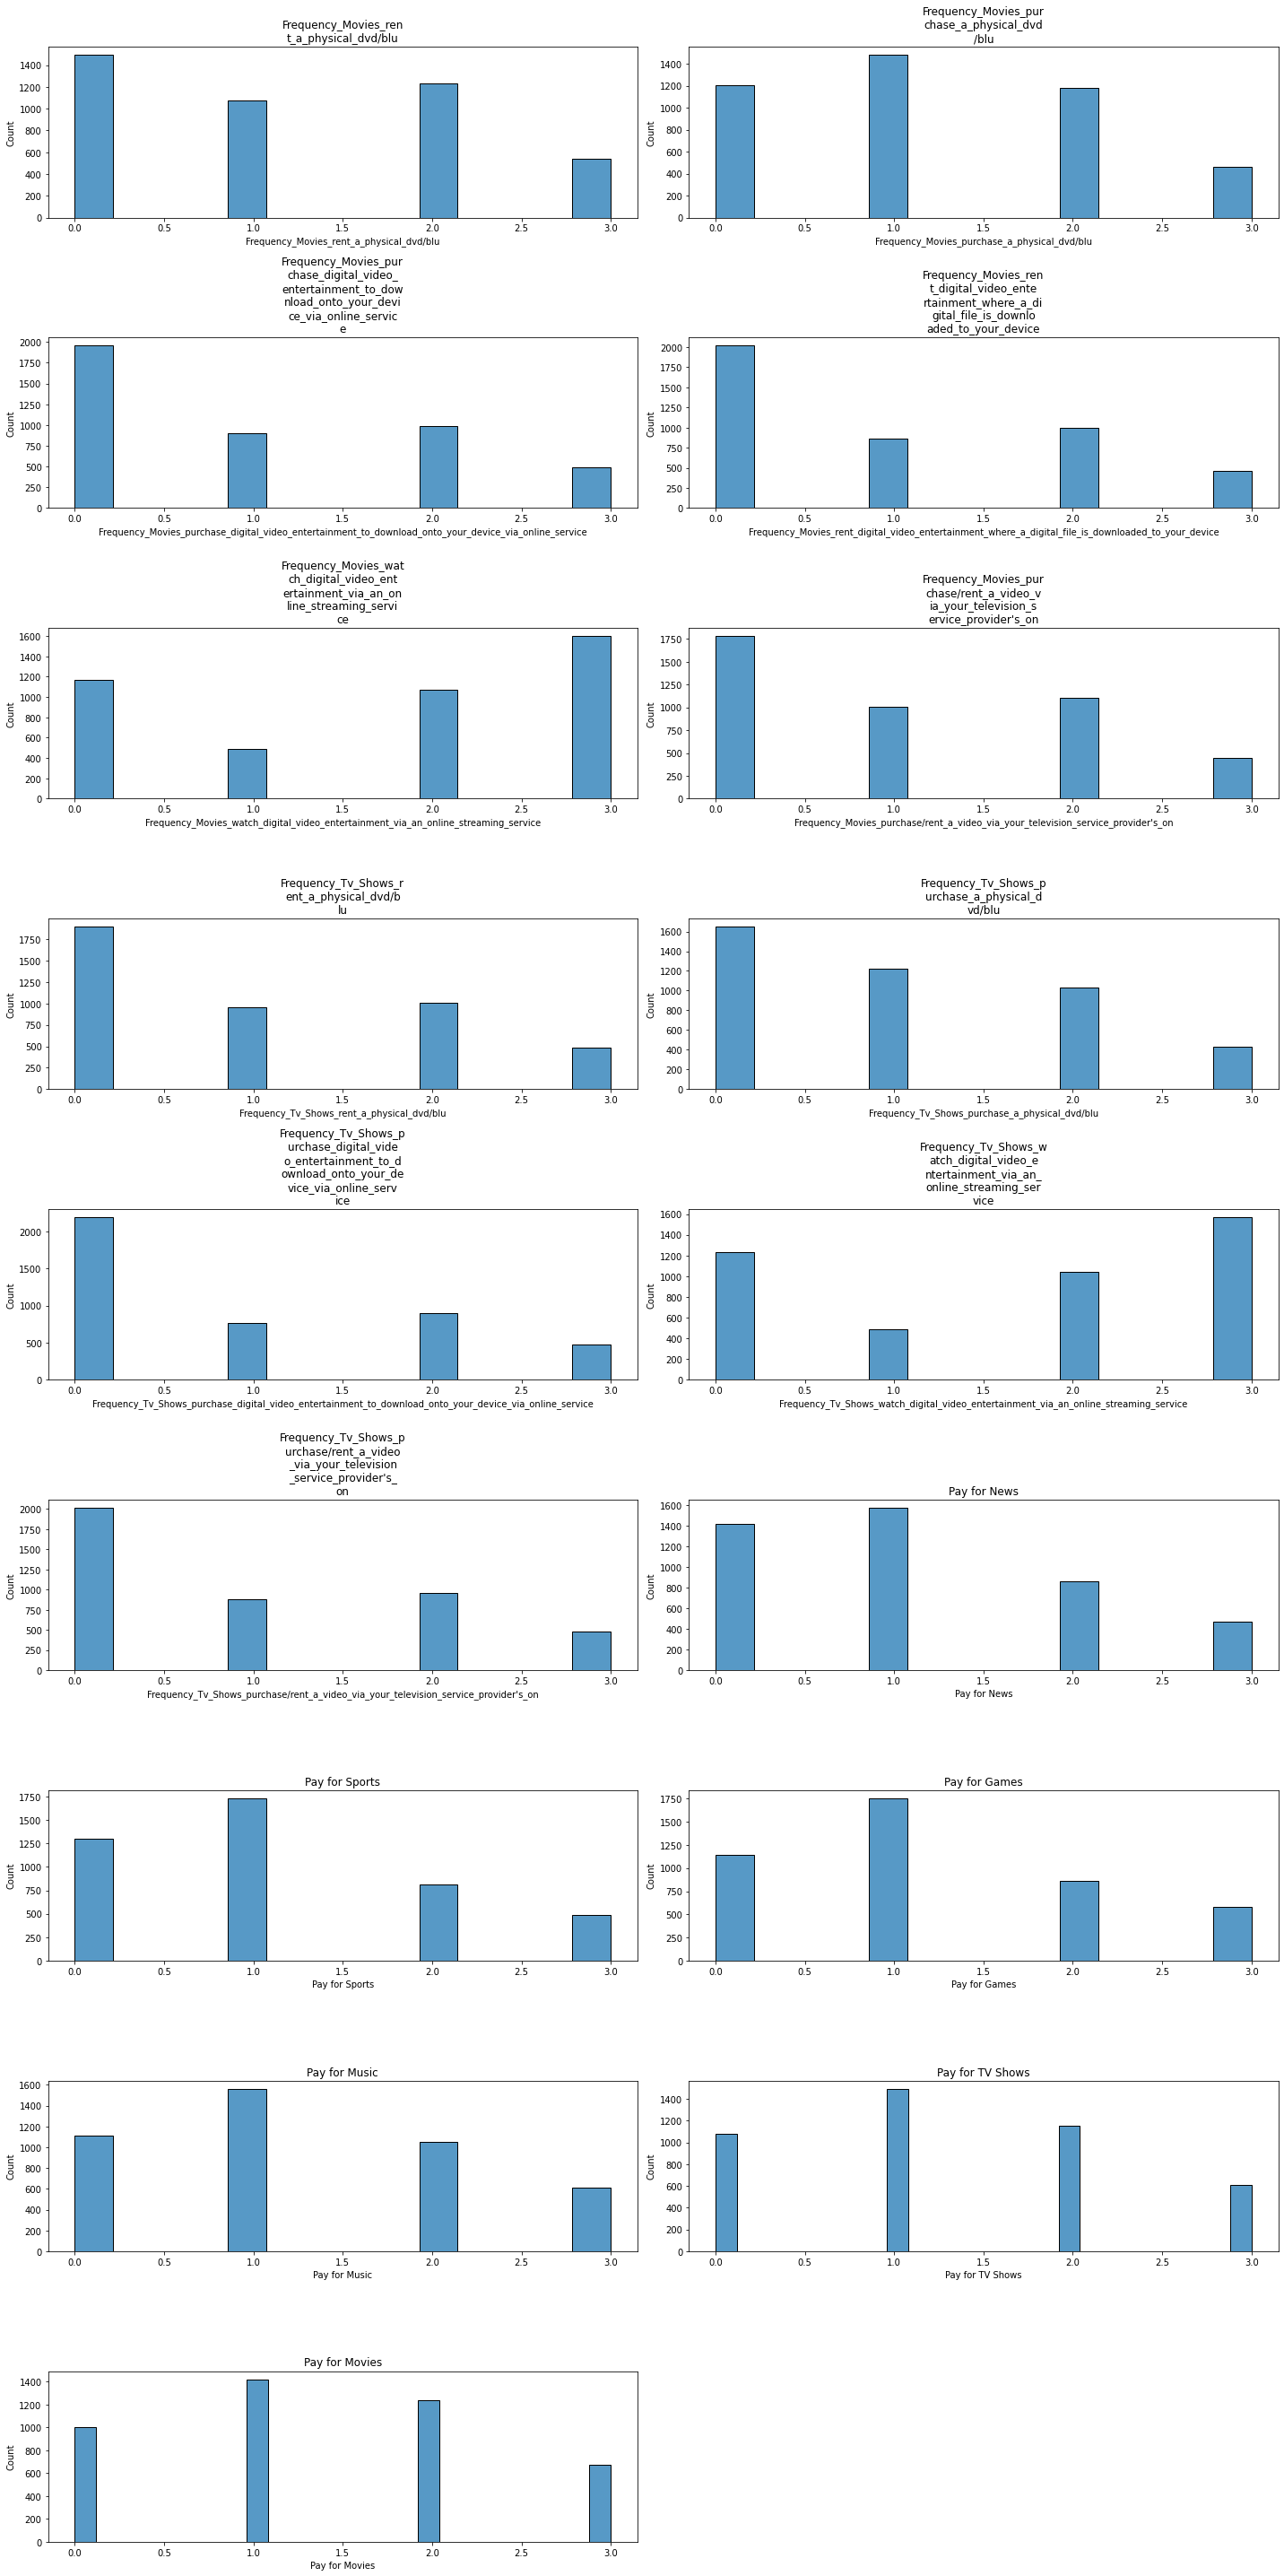

In [ ]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import textwrap

cols = [col for col in df_new.columns if col.startswith('Frequency') or col.startswith('Pay')]

subset_df = df_new[cols]

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20, 40))

for i, col in enumerate(subset_df.columns):
    sns.histplot(subset_df[col], kde=False, ax=axes[i//2, i%2])
    title = col if len(col) <= 20 else '\n'.join(textwrap.wrap(col, width=20))
    axes[i//2, i%2].set_title(title)
    
# Get the axis object of the last subplot and remove the axes and grid
last_ax = axes[-1, -1]
last_ax.set_axis_off()
last_ax.grid(False)

plt.tight_layout()
plt.show()

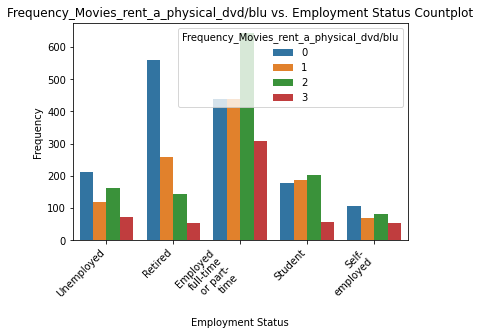

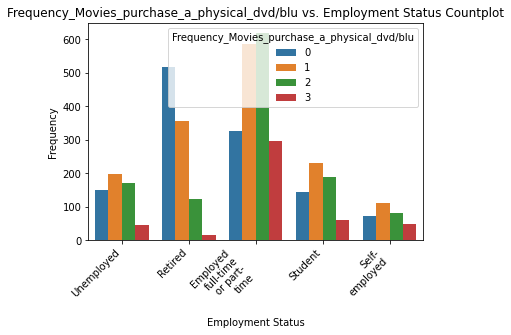

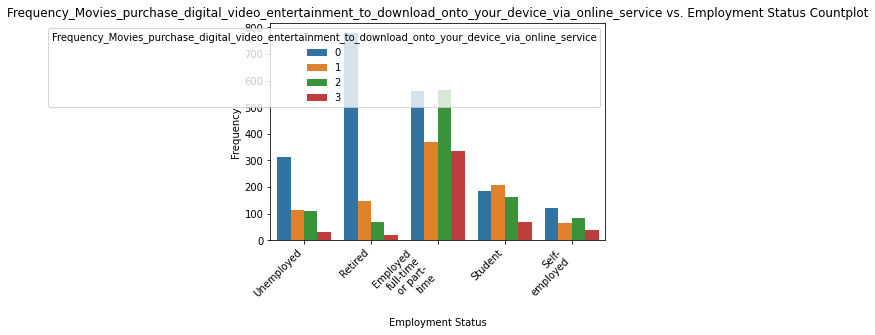

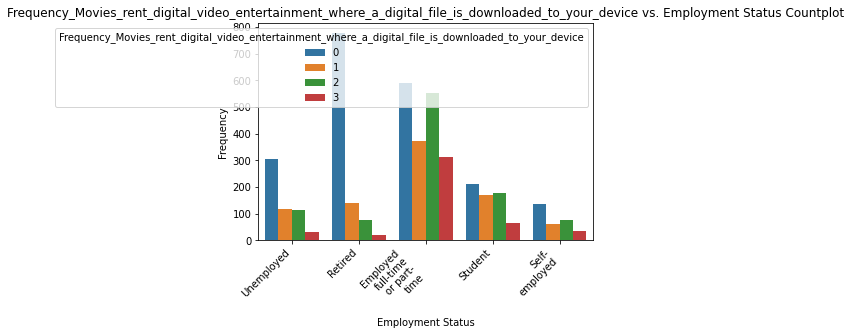

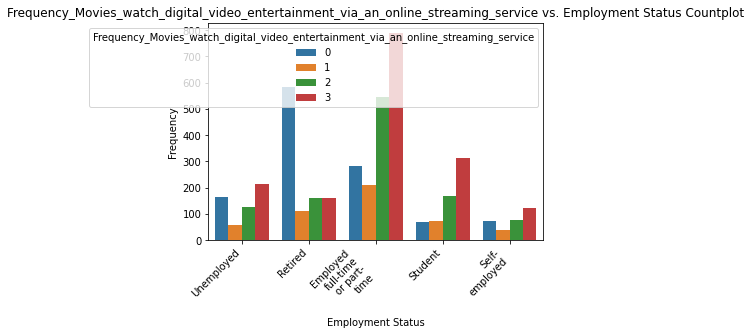

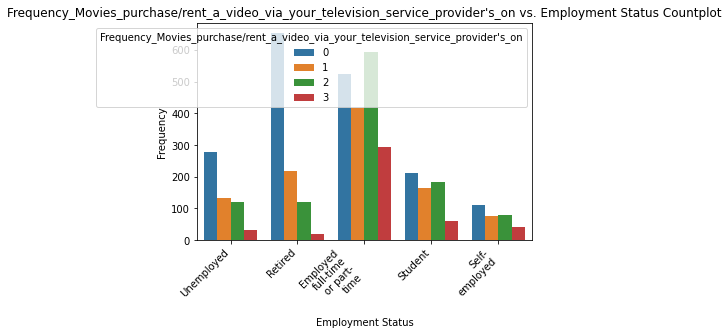

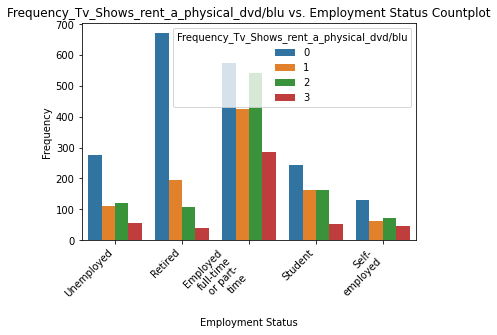

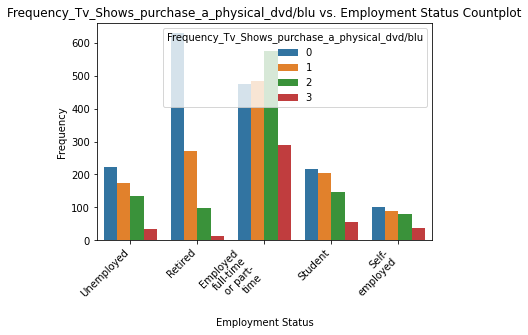

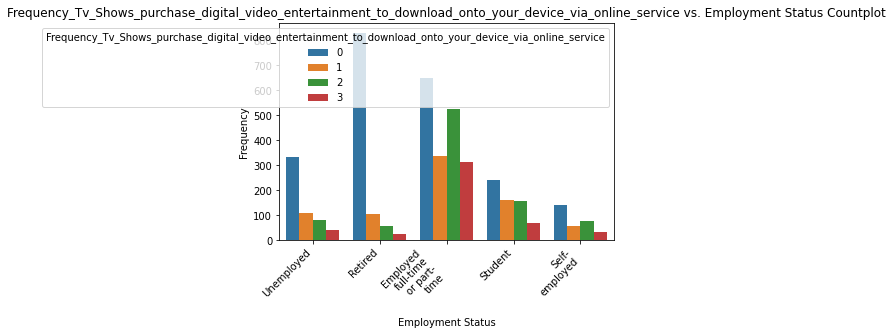

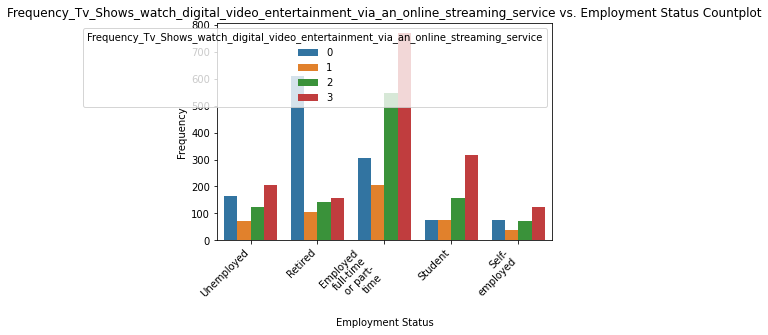

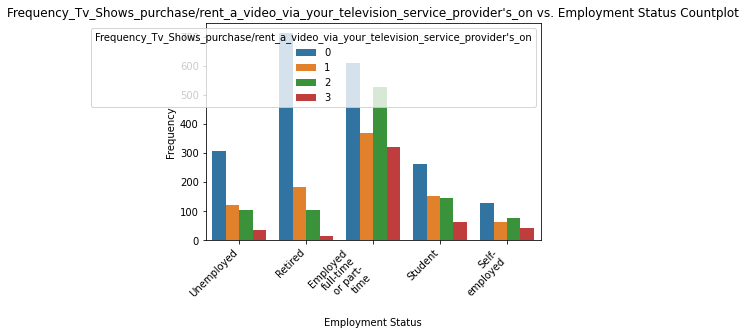

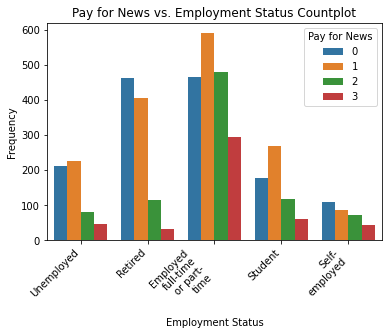

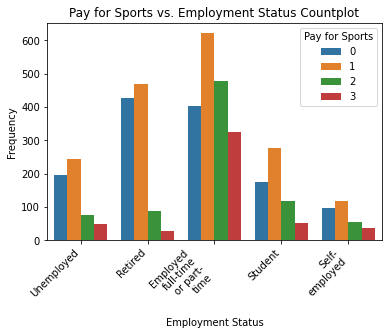

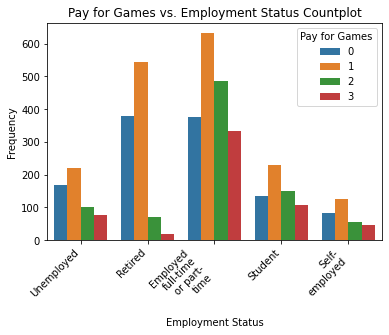

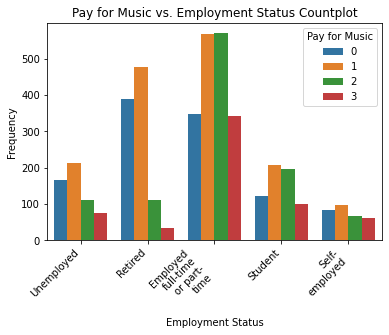

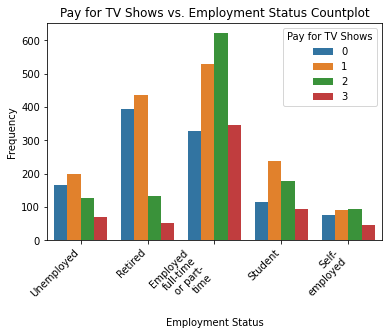

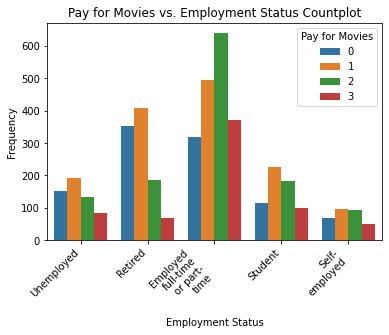

In [ ]:
#Countplot employment
for col in subset_df.columns:
    # create a countplot for the current column
    ax = sns.countplot(data=df_new, x='Emp Status', hue=col)
    # set title and labels
    plt.title(f'{col} vs. Employment Status Countplot')
    ax.set_xlabel('Employment Status')
    plt.ylabel('Frequency')
    # set x-axis tick labels
    xlabels = ax.get_xticklabels()
    wrapped_xlabels = [textwrap.fill(label.get_text(), 10) for label in xlabels]
    ax.set_xticklabels(wrapped_xlabels, rotation=45, ha='right')
    # display the plot
    plt.show()

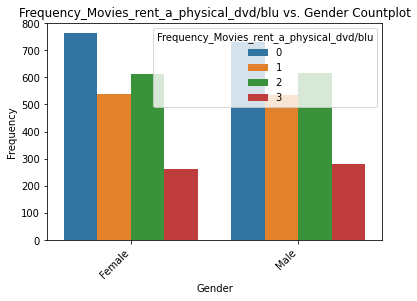

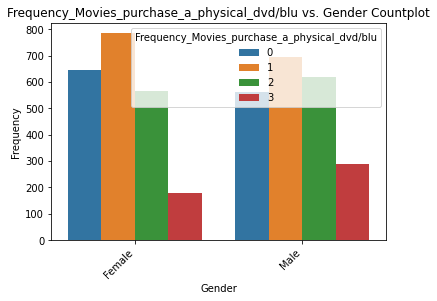

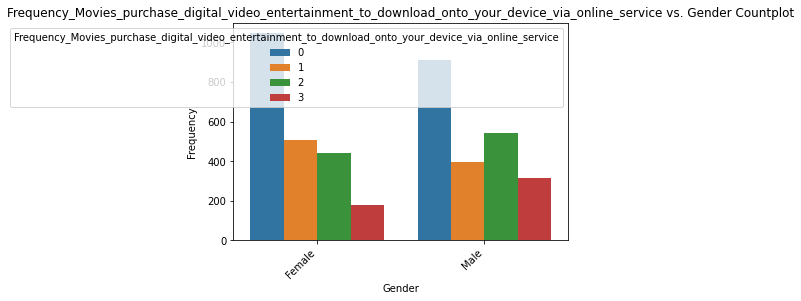

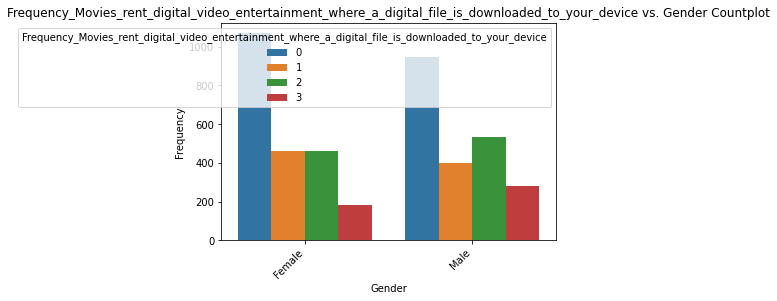

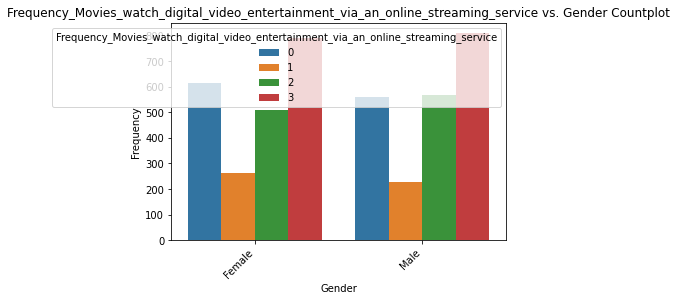

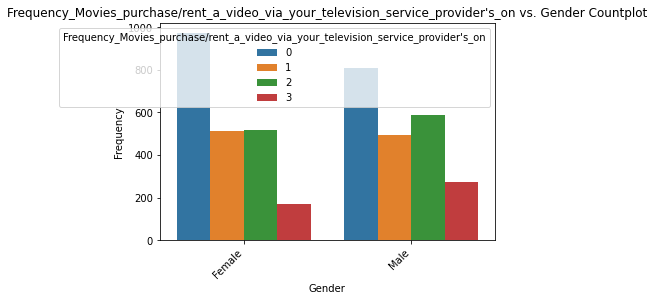

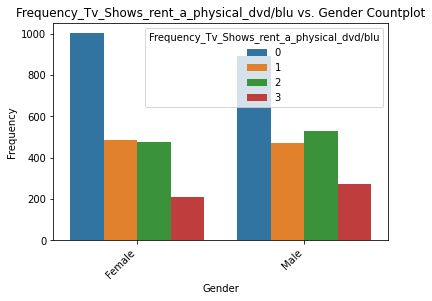

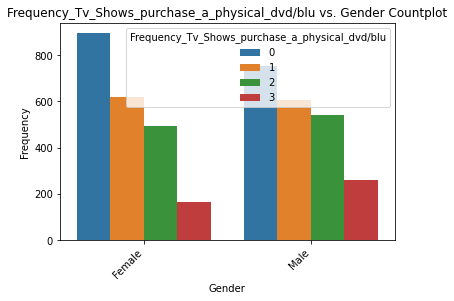

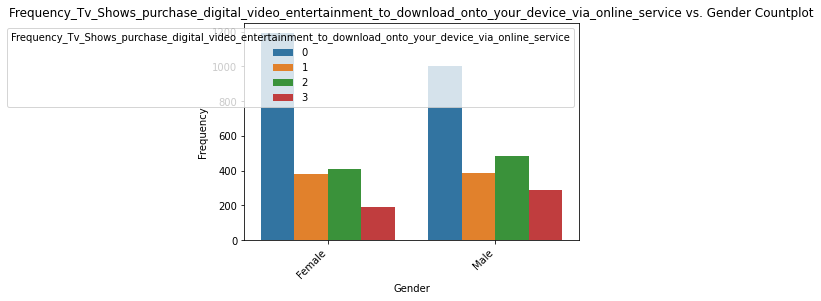

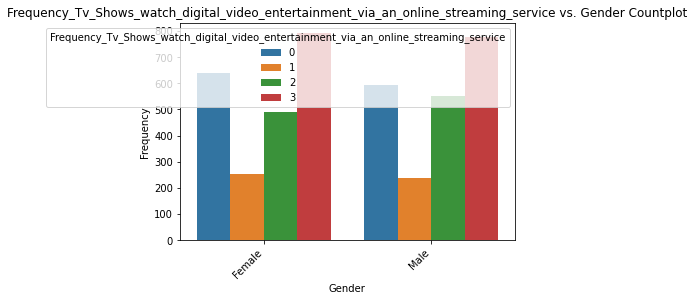

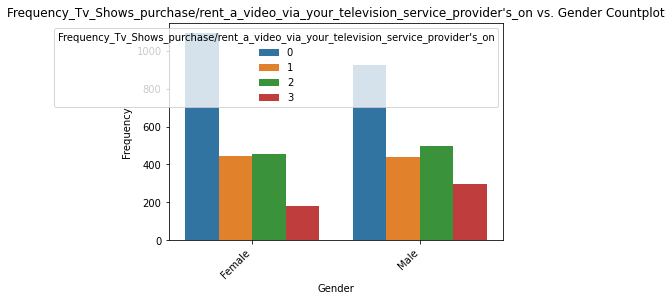

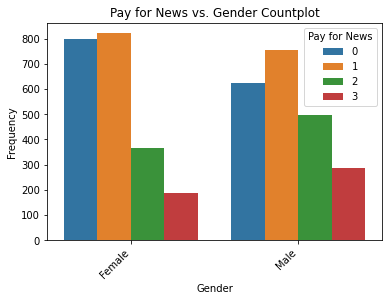

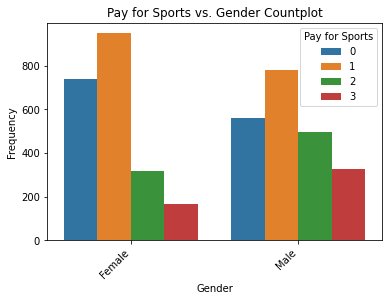

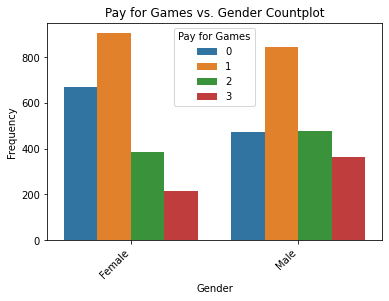

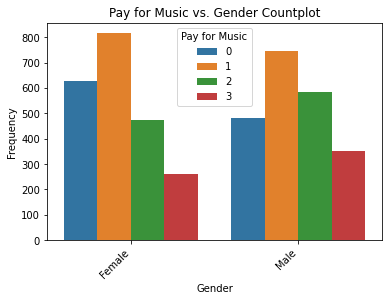

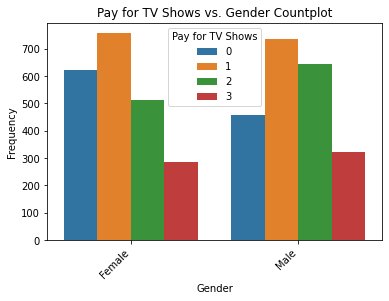

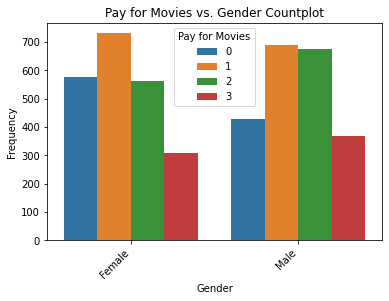

In [ ]:

#Countplot gender

for col in subset_df.columns:
    # create a countplot for the current column
    ax = sns.countplot(data=df_new, x='Gender', hue=col)
    # set title and labels
    plt.title(f'{col} vs. Gender Countplot')
    ax.set_xlabel('Gender')
    plt.ylabel('Frequency')
    # set x-axis tick labels
    xlabels = ax.get_xticklabels()
    wrapped_xlabels = [textwrap.fill(label.get_text(), 10) for label in xlabels]
    ax.set_xticklabels(wrapped_xlabels, rotation=45, ha='right')
    # display the plot
    plt.show()

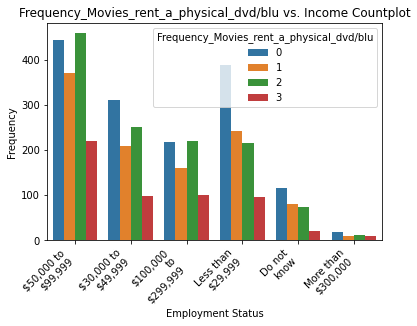

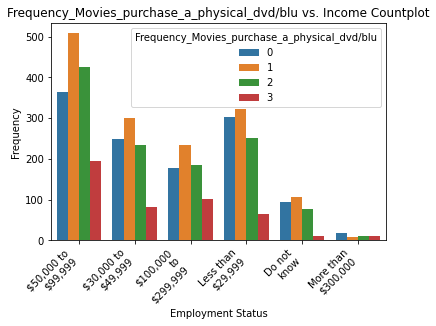

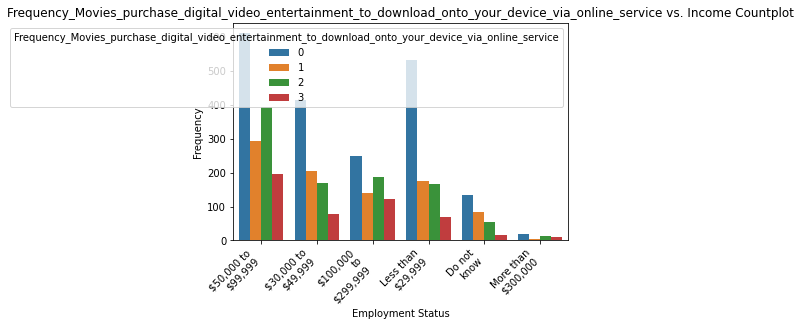

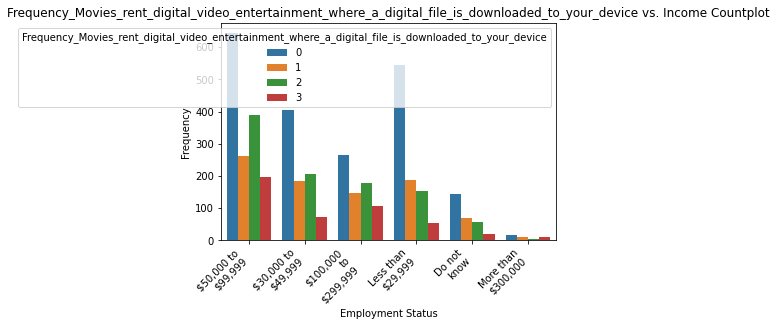

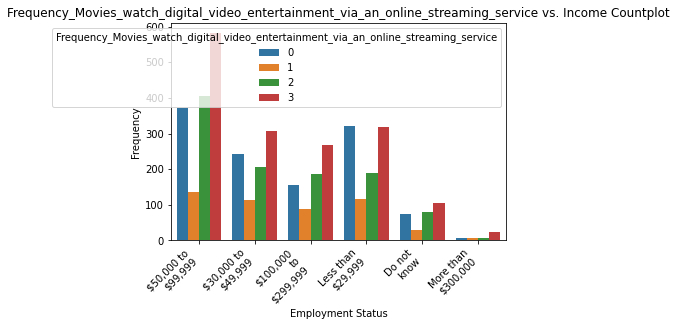

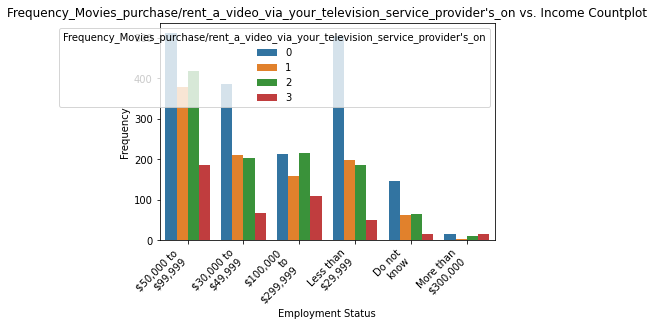

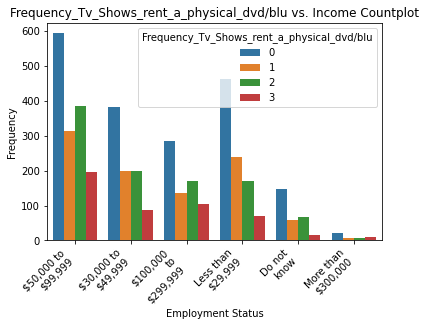

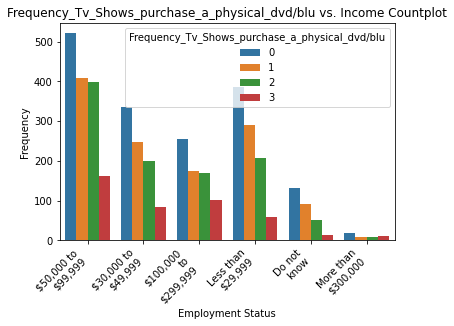

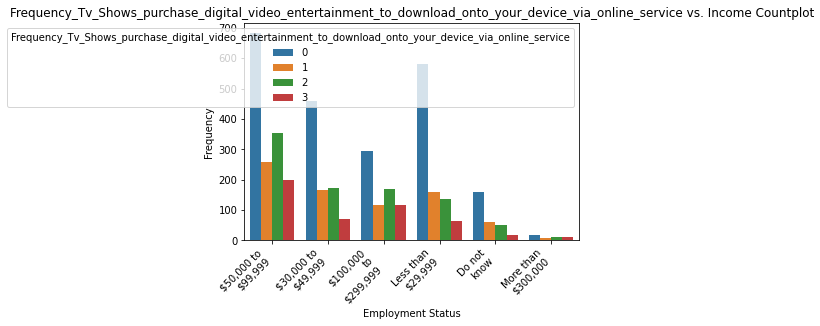

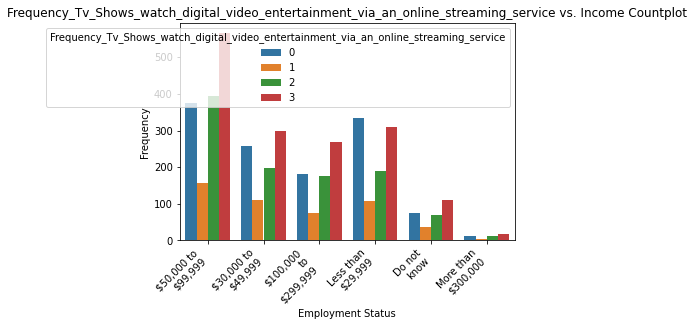

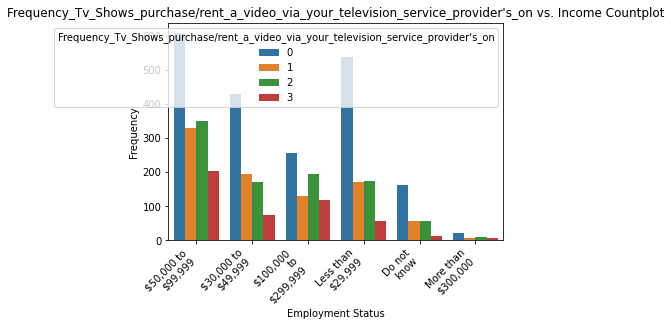

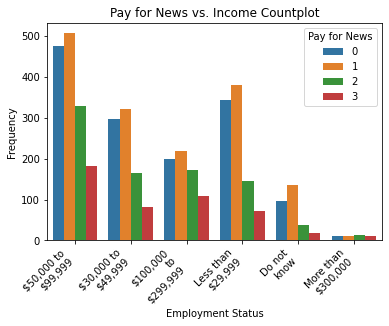

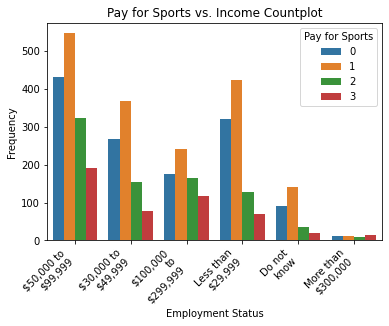

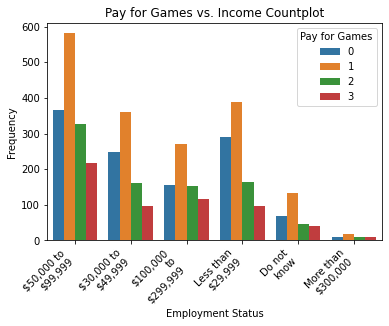

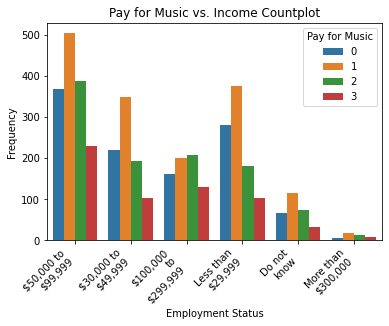

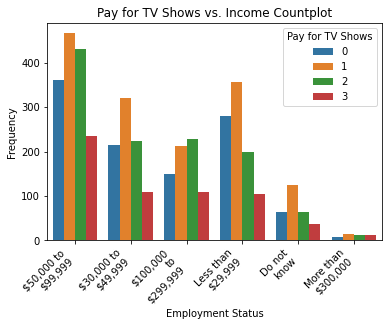

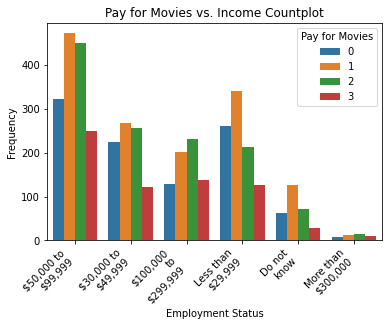

In [ ]:
#Countplot income
for col in subset_df.columns:
    # create a countplot for the current column
    ax = sns.countplot(data=df_new, x='Income', hue=col)
    # set title and labels
    plt.title(f'{col} vs. Income Countplot')
    ax.set_xlabel('Employment Status')
    plt.ylabel('Frequency')
    # set x-axis tick labels
    xlabels = ax.get_xticklabels()
    wrapped_xlabels = [textwrap.fill(label.get_text(), 10) for label in xlabels]
    ax.set_xticklabels(wrapped_xlabels, rotation=45, ha='right')
    # display the plot
    plt.show()

In [ ]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4336.0,1083.815729,626.466410,0.0,541.75,1083.5,1625.25,2204.0
Record Number,4336.0,2714.988007,2983.249901,1.0,988.00,1748.0,2969.25,13026.0
Age,4336.0,42.678967,19.982386,14.0,25.00,38.0,64.00,99.0
children,4336.0,0.385609,0.486795,0.0,0.00,0.0,1.00,1.0
household_own-flat_panel_television,4336.0,0.619465,0.485574,0.0,0.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
Pay for Games,4336.0,1.202260,0.977205,0.0,0.00,1.0,2.00,3.0
Pay for Music,4336.0,1.268911,0.994384,0.0,0.00,1.0,2.00,3.0
Pay for TV Shows,4336.0,1.298432,0.993616,0.0,1.00,1.0,2.00,3.0
Pay for Movies,4336.0,1.364622,1.003401,0.0,1.00,1.0,2.00,3.0


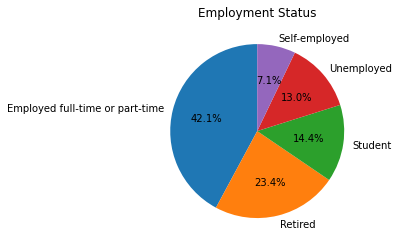

In [ ]:
#Pie chart for distribution of emp status
counts = df_new['Emp Status'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Employment Status')

plt.show()

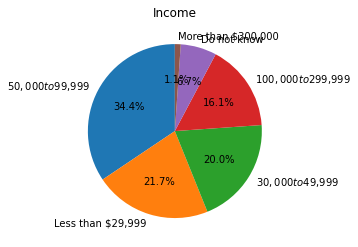

In [ ]:
#Pie chart for distribution of income
counts = df_new['Income'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Income')

plt.show()

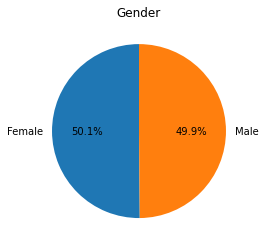

In [ ]:
#Pie chart for distribution of gender
counts = df_new['Gender'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Gender')

plt.show()

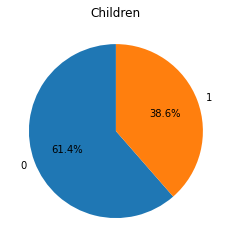

In [ ]:
#Pie chart for distribution of number of children
counts = df_new['children'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Children')

plt.show()

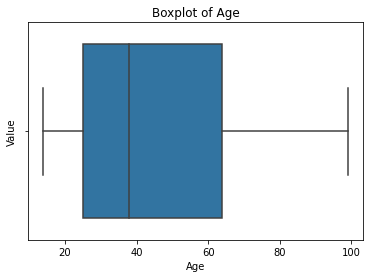

In [ ]:
#Boxplot for age
# create a boxplot of the 'age' column using Seaborn
sns.boxplot(data=df_new, x='Age')

# add title and labels
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Value')

# display the plot
plt.show()

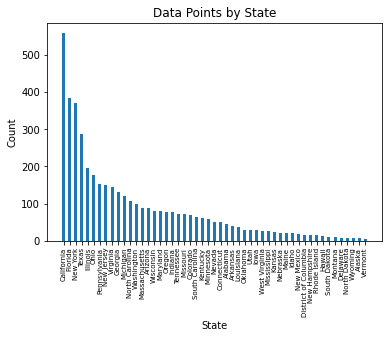

In [ ]:
#Statewise distribution of datapoints
state_counts = df_new['State'].value_counts()

# create a bar chart
plt.bar(state_counts.index, state_counts.values, width=0.5)

# add labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Data Points by State')
plt.xticks(rotation=90, fontsize=7)
# show the plot
plt.show()

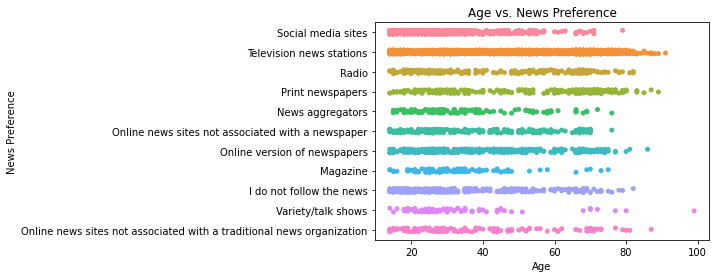

In [ ]:
#Stripplot of age and news preference
sns.stripplot(x='Age', y='newsPref', data=df_new)

# set x-axis and y-axis labels
plt.xlabel('Age')
plt.ylabel('News Preference')

# set title
plt.title('Age vs. News Preference')

# show the plot
plt.show()


## PCA

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm

In [ ]:
df_new2 = merged_10_11_df.copy()
df_numeric = df_new2.select_dtypes(include=['float', 'int'])

In [ ]:
df_numeric = df_numeric.drop(df_numeric.columns[0], axis=1)

In [ ]:
#pca for dimensionality reduction
pca = PCA()
pca.fit(df_numeric)


PCA()

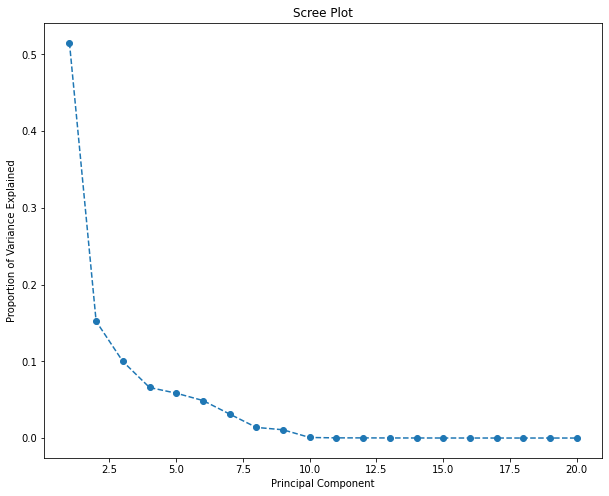

In [ ]:
plt.figure(figsize = (10,8))
n_components = 20 # choose a high number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to your dataframe
pca.fit(df_numeric)

# Plot the scree plot
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker = 'o', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([5.15361416e-01, 1.52188346e-01, 9.98754839e-02, 6.59171884e-02,
       5.84996794e-02, 4.89559762e-02, 3.12968231e-02, 1.38943316e-02,
       1.08043750e-02, 7.56631635e-04, 2.59423011e-04, 2.30139347e-04,
       1.31403499e-04, 1.16835115e-04, 7.95604405e-05, 6.65610353e-05,
       5.89473892e-05, 5.51833195e-05, 5.01013852e-05, 4.64125923e-05])

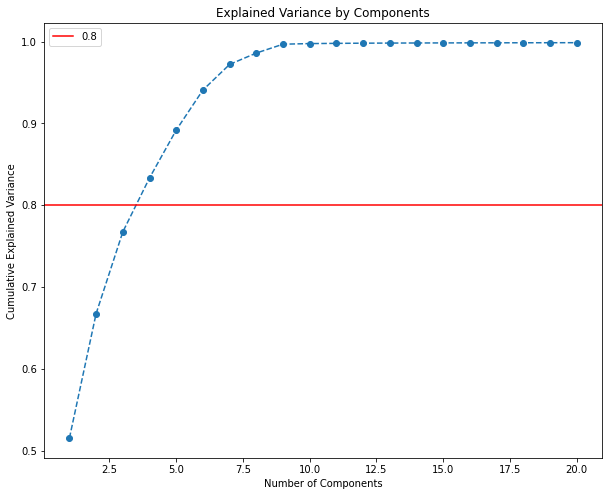

In [ ]:
# Create the plot
plt.figure(figsize = (10,8))
plt.plot(range(1,n_components+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

# Add the horizontal line
plt.axhline(y=0.8, color='r', linestyle='-', label='0.8')

# Add labels and title
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
pca.fit(df_numeric)

PCA(n_components=20)

In [ ]:
pca.transform(df_numeric)

array([[ 7.43649878e+01,  1.03638074e+00,  1.47371082e+01, ...,
         1.88997421e-01,  5.99543031e-01,  1.32045905e-02],
       [-1.20902590e+01, -2.92033214e+01, -4.75581275e+01, ...,
        -7.69929807e-01, -1.47696872e-01, -9.07064031e-02],
       [-3.07681283e+01, -3.63893140e+01, -6.12308231e+01, ...,
         3.11051381e-01, -3.46967626e-01, -7.84538359e-02],
       ...,
       [-1.78258328e+01,  1.07811929e+00,  6.15098969e+01, ...,
         4.29865302e-01, -2.42279696e-01,  1.22072281e-01],
       [-9.30310997e+01,  1.62428456e+01, -3.77565780e+00, ...,
         4.84236220e-01,  3.74771524e-01,  8.00350751e-01],
       [ 9.57025420e+01,  7.27790573e+01, -3.09622306e+01, ...,
         3.76908761e-01, -2.25355580e-01,  1.01093326e-01]])

In [ ]:
scores_pca = pca.transform(df_numeric)

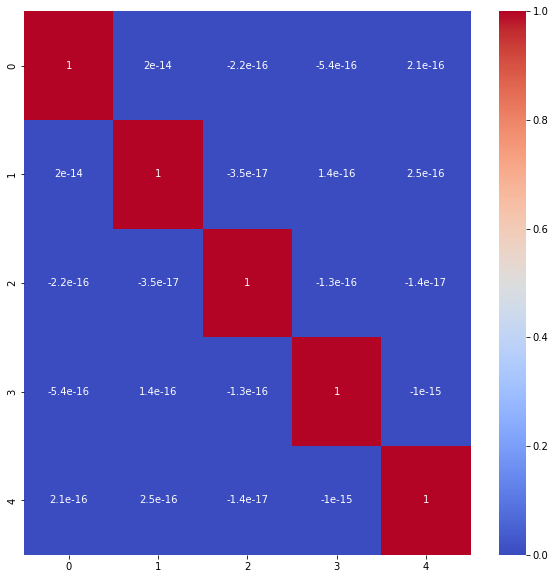

In [ ]:
n_components = 5 # choose the number of principal components to use
pca = PCA(n_components=n_components)

# Fit the PCA model to your dataframe
pca.fit(df_numeric)

# Transform the dataframe into the reduced dimension space
df_pca = pca.transform(df_numeric)

# Get the column names of the transformed dataframe
new_columns = ['PC{}'.format(i+1) for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=new_columns)

# Compute the correlation matrix of the principal components
corr_mat = np.corrcoef(df_pca.transpose())

# Set the figure size
plt.figure(figsize=(10, 10))

# Create the heatmap
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


##Clustering

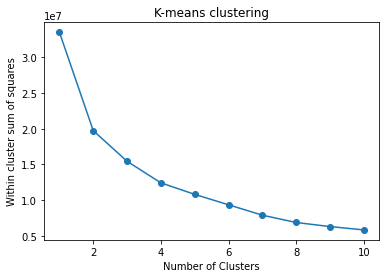

We observe the kink at num of clusters = 2


In [ ]:
# Before K-means clustering, the number of clusters need to be identified.
# To do so, we use the elbow method and identify the 'kink' point

# To create the elbow plot, we will store the sum of squared distances for each value of cluster num.
within_cluster_sum_sqs = []

# We check for 10 clusters
for i in range(1,11):
    # Using a seed value for random state, to make results reproducible
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # Using the PCA scores instead of original features
    kmeans.fit(scores_pca)
    within_cluster_sum_sqs.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), within_cluster_sum_sqs, marker = 'o')
plt.title('K-means clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

print("We observe the kink at num of clusters = {}".format(2))

In [ ]:
# Now, we can perform K-means with no of clusters = 4

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Adding component scores from PCA as new columns
result_df = pd.concat([merged_10_11_df.reset_index(drop = True), df_pca], axis = 1)
# Adding the cluster labels
result_df['Cluster'] = kmeans.labels_
# The Cluster numbers are mapped to categorical values for plotting
result_df['ClusterName'] = result_df['Cluster'].map({0:'one', 1:'two', 2:'three', 3:'four'})

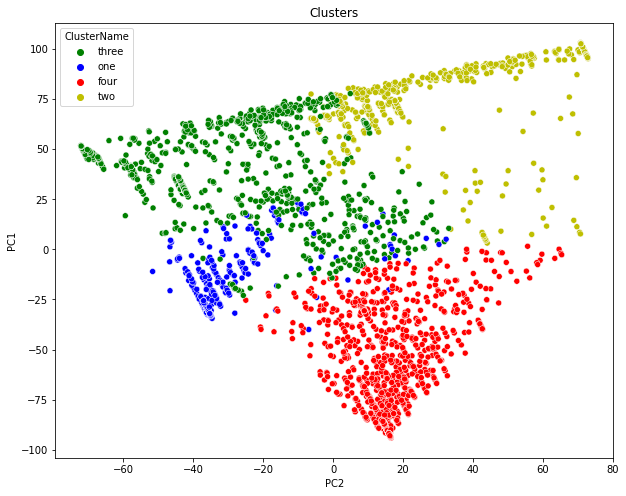

In [ ]:
# To plot the clusters, the clusters are plotted on a 2D plane with the two components
# PC1 and PC2 that explain the most variance

x_axis = result_df['PC2']
y_axis = result_df['PC1']
plt.figure(figsize = (10, 8))
sb.scatterplot(x='PC2', y='PC1', hue='ClusterName', data=result_df, palette=['g', 'b', 'r','y'])
plt.title('Clusters')
plt.show()